# Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Loading 

In [2]:
pd.options.display.max_columns = 30
df = pd.read_csv(f'Data/CarPrice_Assignment.csv')

In [3]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- `Car_ID` - Unique id of each observation (Interger)

- `Symboling` - Its assigned insurance risk rating, Value of +3 -> auto is risky, -3 -> probably pretty safe.

- `CarName` - Name of Cars (Categorical)

- `Car_comp` - Name of car company (Categorical)

- `fueltype` - Car fuel type i.e gas or diesel (Categorical)

- `aspiration` - Aspiration used in a car (Categorical)	

- `doornumber` - Number of doors in a car (Categorical)	

- `carbody` - body of car (Categorical)		

- `drivewheel` - type of drive wheel (Categorical)		

- `enginelocation` - Location of car engine (Categorical)	

- `wheelbase` - Weelbase of car (Numeric)		

- `carlength` - Length of car (Numeric)		

- `carwidth` - Width of car (Numeric)		

- `carheight` - Height of car (Numeric)		

- `curbweight` - The weight of a car without occupants or baggage. (Numeric)

- `enginetype` - Type of engine. (Categorical)		

- `cylindernumber` - cylinder placed in the car (Categorical)	

- `enginesize` - Size of car (Numeric)		

- `fuelsystem` - Fuel system of car (Categorical)

- `boreratio` - Boreratio of car (Numeric)		

- `stroke` - Stroke or volume inside the engine (Numeric)	

- `compressionratio` - Compression ratio of car (Numeric)	

- `horsepower` - Horsepower (Numeric)	

- `peakrpm` - Car peak rpm (Numeric)	

- `citympg` - Mileage in city (Numeric)

- `highwaympg` - Mileage on highway (Numeric)

- `price` - Price of car (Numeric)		


In [5]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
def find_missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    return pd.concat([total,percentage] , axis = 1 , keys = ['Total' , 'Percent'])
find_missing_data(df)

Total  Percent
car_ID                0      0.0
symboling             0      0.0
highwaympg            0      0.0
citympg               0      0.0
peakrpm               0      0.0
horsepower            0      0.0
compressionratio      0      0.0
stroke                0      0.0
boreratio             0      0.0
fuelsystem            0      0.0
enginesize            0      0.0
cylindernumber        0      0.0
enginetype            0      0.0
curbweight            0      0.0
carheight             0      0.0
carwidth              0      0.0
carlength             0      0.0
wheelbase             0      0.0
enginelocation        0      0.0
drivewheel            0      0.0
carbody               0      0.0
doornumber            0      0.0
aspiration            0      0.0
fueltype              0      0.0
CarName               0      0.0
price                 0      0.0

# Cleaning the Dataset

Creating a copy of original datasets for Data Cleaning

In [7]:
train = df.copy()

In [8]:
train.drop(['car_ID'],axis=1, inplace=True)

In [9]:
train["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### Observation:

There seems to be some spelling error in the CarName column.
    
maxda = mazda
Nissan = nissan
porcshce = porsche 
toyouta = toyota
vokswagen/vw =  volkswagen
    


#### Creating a new column for Car Company names

In [10]:
car_comps = train['CarName'].str.split(' ', expand=True)

In [11]:
car_comps

0             1     2     3     4
0    alfa-romero        giulia  None  None  None
1    alfa-romero       stelvio  None  None  None
2    alfa-romero  Quadrifoglio  None  None  None
3           audi           100    ls  None  None
4           audi         100ls  None  None  None
..           ...           ...   ...   ...   ...
200        volvo          145e  (sw)  None  None
201        volvo         144ea  None  None  None
202        volvo         244dl  None  None  None
203        volvo           246  None  None  None
204        volvo         264gl  None  None  None

[205 rows x 5 columns]

In [12]:
train['Car_comp'] = car_comps[0]

In [13]:
train

symboling                   CarName fueltype aspiration doornumber  \
0            3        alfa-romero giulia      gas        std        two   
1            3       alfa-romero stelvio      gas        std        two   
2            1  alfa-romero Quadrifoglio      gas        std        two   
3            2               audi 100 ls      gas        std       four   
4            2                audi 100ls      gas        std       four   
..         ...                       ...      ...        ...        ...   
200         -1           volvo 145e (sw)      gas        std       four   
201         -1               volvo 144ea      gas      turbo       four   
202         -1               volvo 244dl      gas        std       four   
203         -1                 volvo 246   diesel      turbo       four   
204         -1               volvo 264gl      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0    convertible        rwd          front       88.6      168.8      64.1   
1    convertible        rwd          front       88.6      168.8      64.1   
2      hatchback        rwd          front       94.5      171.2      65.5   
3          sedan        fwd          front       99.8      176.6      66.2   
4          sedan        4wd          front       99.4      176.6      66.4   
..           ...        ...            ...        ...        ...       ...   
200        sedan        rwd          front      109.1      188.8      68.9   
201        sedan        rwd          front      109.1      188.8      68.8   
202        sedan        rwd          front      109.1      188.8      68.9   
203        sedan        rwd          front      109.1      188.8      68.9   
204        sedan        rwd          front      109.1      188.8      68.9   

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0         48.8        2548       dohc           four         130       mpfi   
1         48.8        2548       dohc           four         130       mpfi   
2         52.4        2823       ohcv            six         152       mpfi   
3         54.3        2337        ohc           four         109       mpfi   
4         54.3        2824        ohc           five         136       mpfi   
..         ...         ...        ...            ...         ...        ...   
200       55.5        2952        ohc           four         141       mpfi   
201       55.5        3049        ohc           four         141       mpfi   
202       55.5        3012       ohcv            six         173       mpfi   
203       55.5        3217        ohc            six         145        idi   
204       55.5        3062        ohc           four         141       mpfi   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price     Car_comp  
0            27  13495.0  alfa-romero  
1            27  16500.0  alfa-romero  
2            26  16500.0  alfa-romero  
3            30  13950.0         audi  
4            22  17450.0         audi  
..          ...      ...          ...  
200          28  16845.0        volvo  
201      

In [14]:
train["Car_comp"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
train['Car_comp'] = train['Car_comp'].replace({ 'maxda': 'mazda', 
                                                'porcshce':'porsche',
                                                'Nissan': 'nissan',
                                                'toyouta': 'toyota',
                                                'vokswagen': 'volkswagen', 'vw': 'volkswagen', 
                                                'volkswagen':'volkswagen' })

In [16]:
num_cars = len(train["Car_comp"].unique())
print(f"Total No. of Unique Car Companies: {num_cars}.")

Total No. of Unique Car Companies: 22.


# Exploratory Data Analysis

### Car Price Destribution

In [17]:
train.price.describe().to_frame().T

count          mean          std     min     25%      50%      75%  \
price  205.0  13276.710571  7988.852332  5118.0  7788.0  10295.0  16503.0   

           max  
price  45400.0

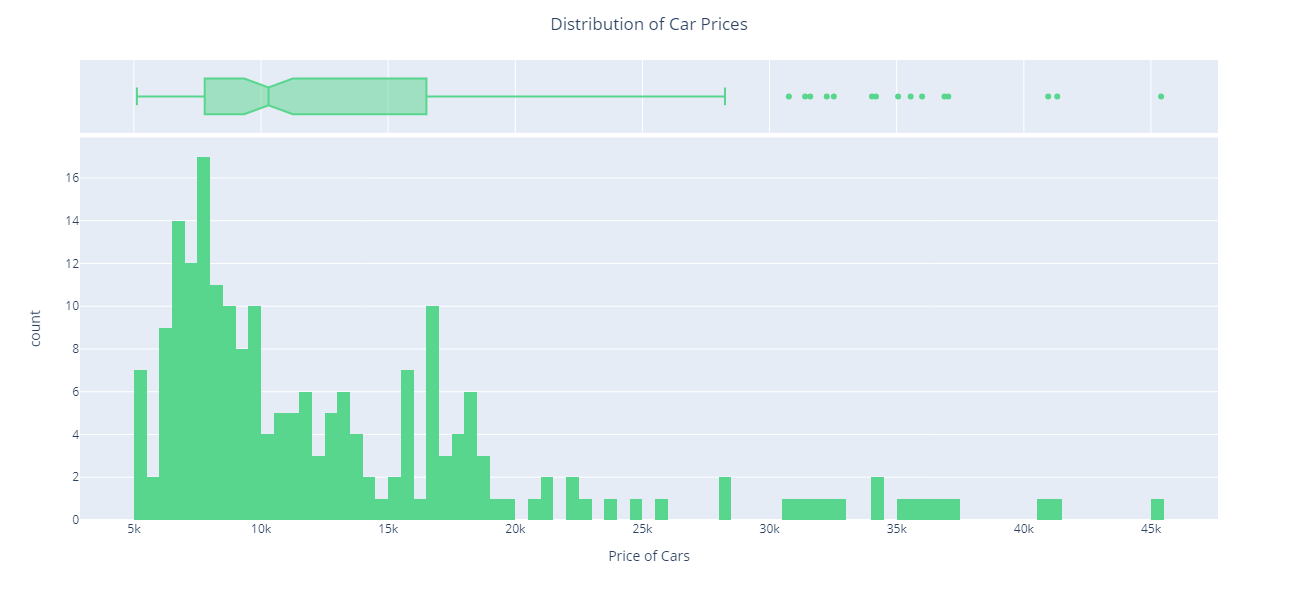

In [18]:
fig = px.histogram(data_frame = train, 
                   x="price",
                   color_discrete_sequence =  ['#58D68D'],
                   marginal="box",
                   nbins= 100,
                   labels={
                     "price": "Price of Cars"
                     }
                   )
fig.update_layout(height=600,
                  title = "Distribution of Car Prices" , title_x = 0.5,showlegend=False)
fig.show()

### Car Companies

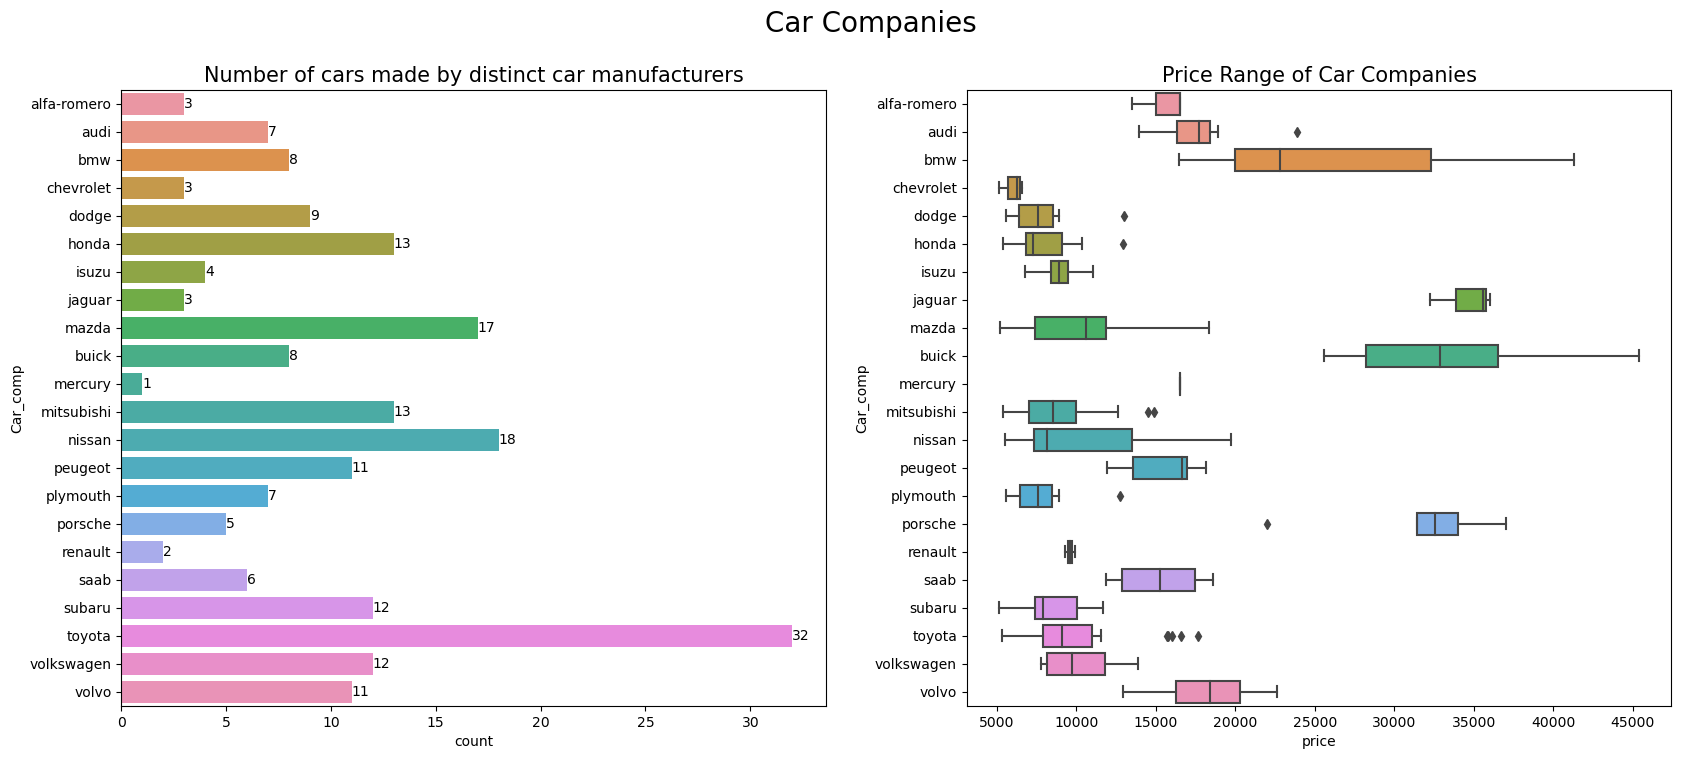

In [19]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["Car_comp"], ax=ax[0]).set_title("Number of cars made by distinct car manufacturers", fontsize=15)
sns.boxplot(data=train, y="Car_comp",x="price", ax=ax[1]).set_title("Price Range of Car Companies", fontsize=15)

plt.suptitle('Car Companies', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

### Fuel Types

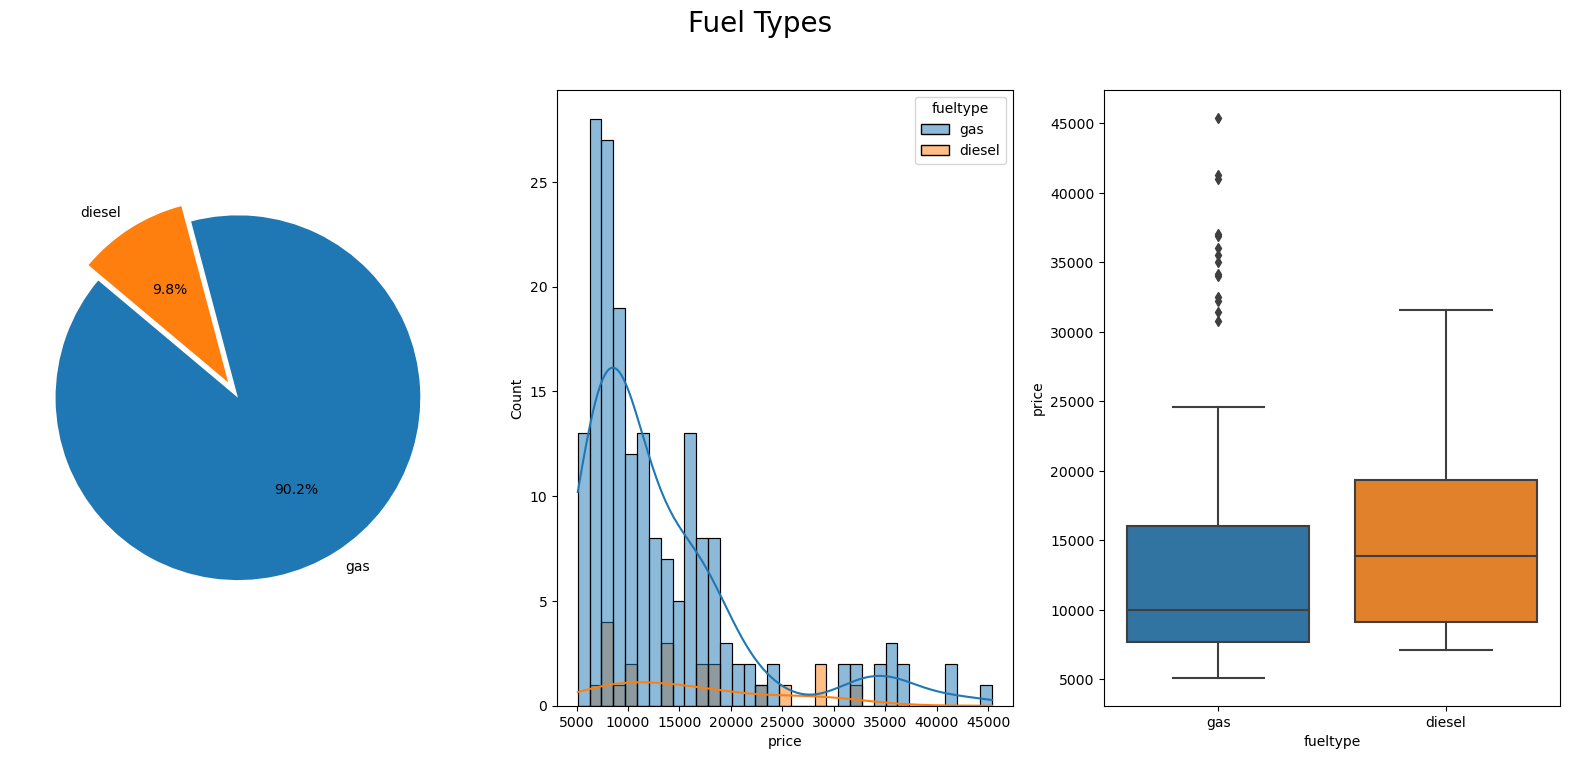

In [20]:
fig, ax = plt.subplots(1,3 ,figsize=(20,8))

labels = train['fueltype'].value_counts().index
sizes = train['fueltype'].value_counts().values

ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',explode=[0, 0.1], startangle=140)
sns.histplot(data=train, x="price", hue="fueltype", kde=True, bins = 35, ax=ax[1])
sns.boxplot(data=train, x="fueltype",y="price", ax=ax[2])


plt.suptitle('Fuel Types', fontsize=20)

plt.show()

#### Observation:
- Most of the cars are powered by gas.
- We can observe that there are cars with a gas fuel system for all price ranges.
- The average cost of gas powered vehicles is lower than the average cost of diesel vehicles.

### Aspiration

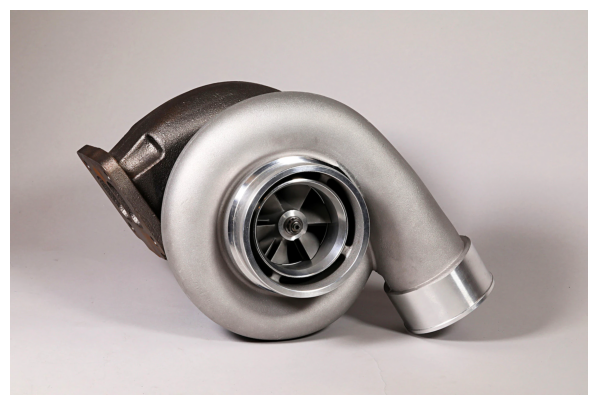

In [21]:
%matplotlib inline
img=mpimg.imread("Images/turbo.webp")
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(img)
plt.show()

#### A naturally aspirated engine is a simple engine that doesn’t use anything special to power itself. It draws the air from outside at atmospheric pressure and pushes it on to the combustion chamber through an intake manifold.

#### Turbochargers are pretty much small turbines powered by exhaust and fresh air to increase the power of an engine by forcing more air into the combustion chamber. This forced air known as ‘boost’ causes a bigger bang in the chamber thus providing more power. The main reason for the boost is the pressure of the air is more than the atmospheric pressure.

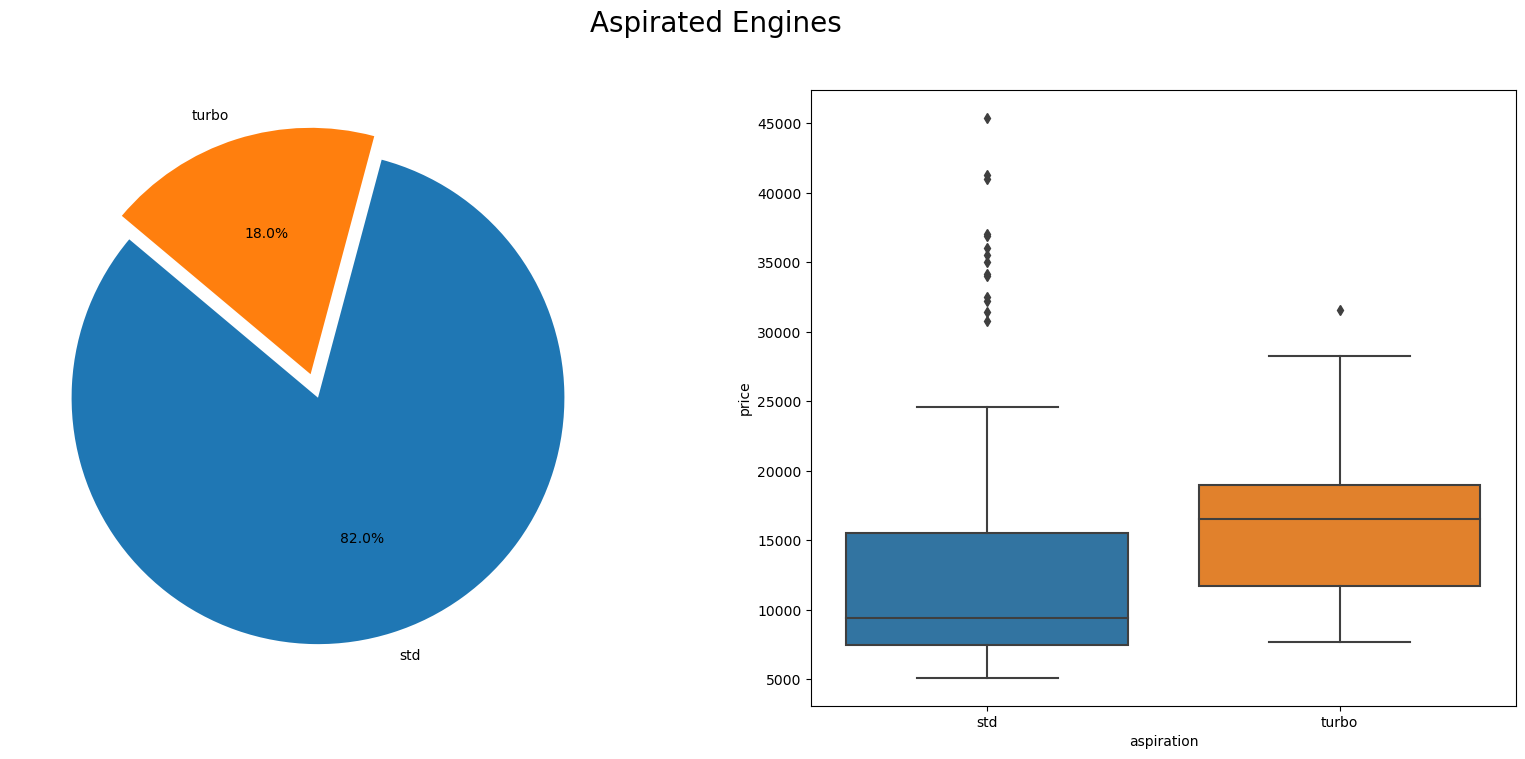

In [22]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

labels = train['aspiration'].value_counts().index
sizes = train['aspiration'].value_counts().values

ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',explode=[0, 0.1], startangle=140)
sns.boxplot(data=train, x="aspiration",y="price", ax=ax[1])


plt.suptitle('Aspirated Engines', fontsize=20)

plt.show()

#### Observation:
- When opposed to cars with turbo aspiration, STD aspiration vehicles sell more frequently.
- Automobiles with turbo aspiration cost more than those with standard aspiration.
- Vehicles with STD engines often cost less than those with turbo engines.

### Door Numbers

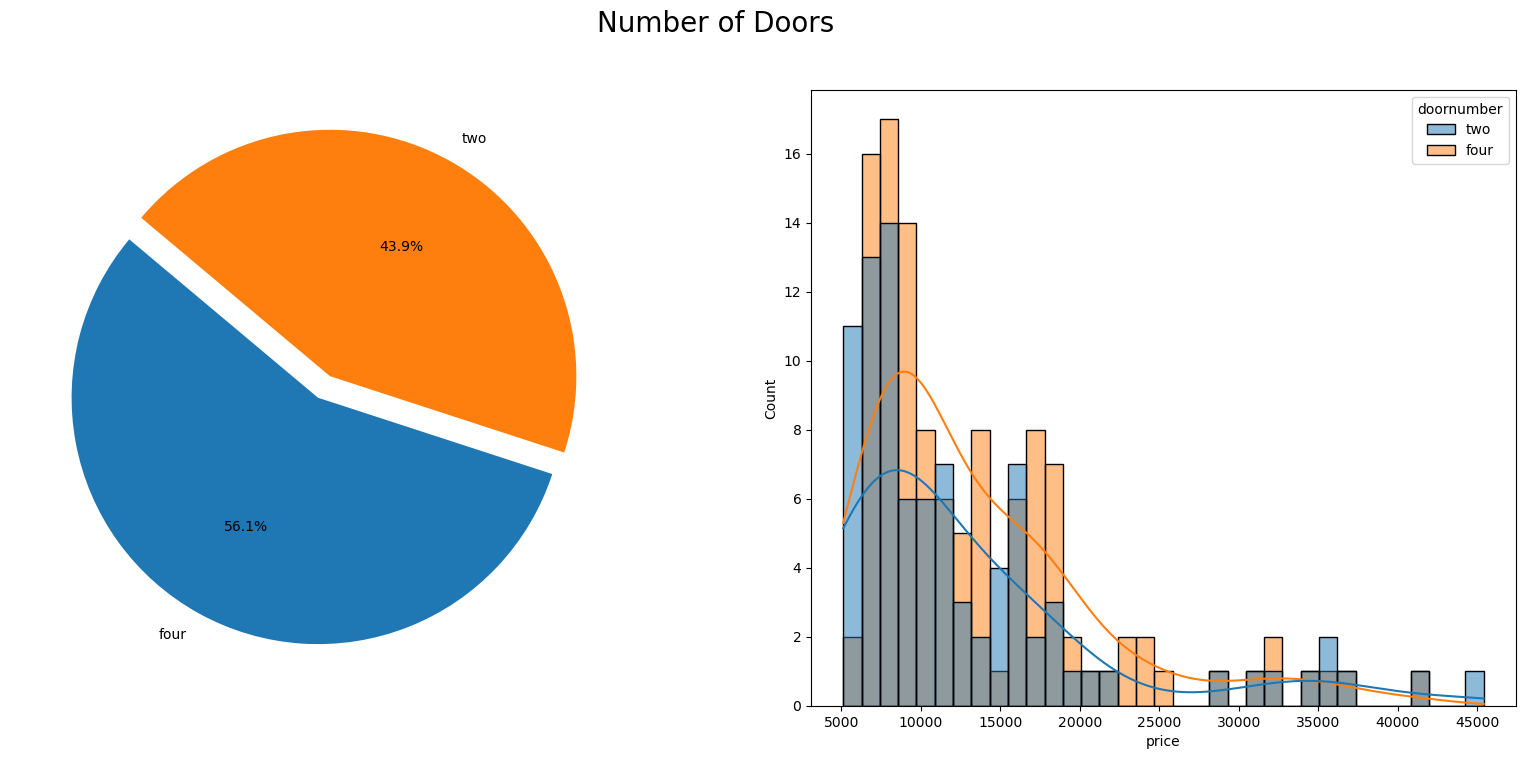

In [23]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

labels = train['doornumber'].value_counts().index
sizes = train['doornumber'].value_counts().values

ax[0].pie(sizes, labels=labels, autopct='%1.1f%%',explode=[0, 0.1], startangle=140)
sns.histplot(data=train, x="price", hue="doornumber", bins = 35, kde=True, ax=ax[1])

plt.suptitle('Number of Doors', fontsize=20)

plt.show()

#### Observation:

- When comparing the average price of cars with two doors to those with four doors, cars with four doors are slightly more expensive.
- The sales of cars with four doors against those with two doors do not differ much, indicating that the number of doors has little impact on the price of the car.

## Car Body

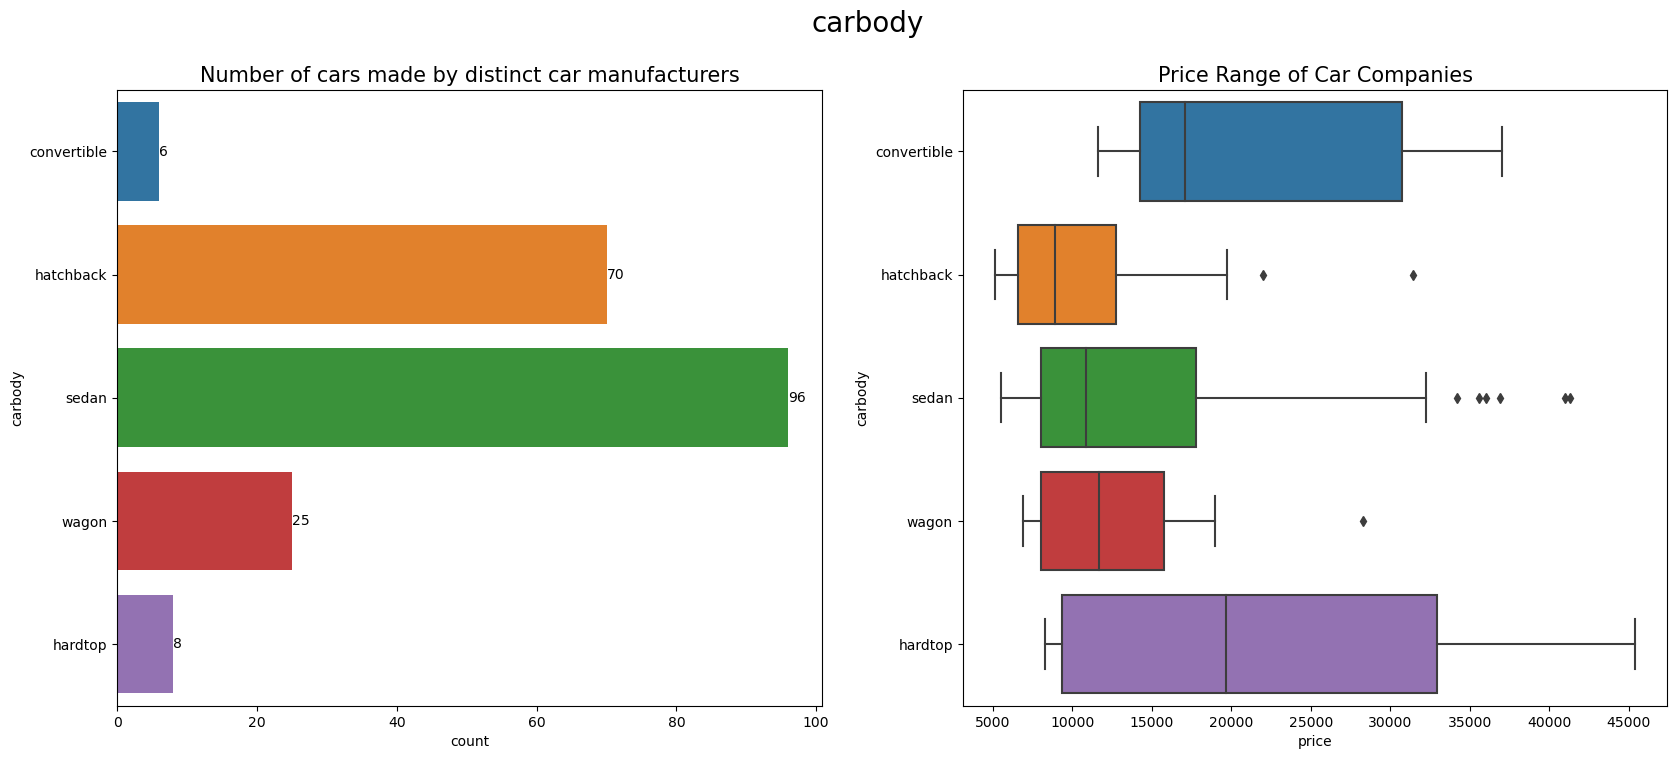

In [24]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["carbody"], ax=ax[0]).set_title("Number of cars made by distinct car manufacturers", fontsize=15)
sns.boxplot(data=train, y="carbody",x="price", ax=ax[1]).set_title("Price Range of Car Companies", fontsize=15)

plt.suptitle('carbody', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

#### Observation:

- Convertible & Hardtop body-types are less sold because they are very expensive cars.
- Sedans and Hatchback are the most sold vehicles. Cars having Sedan body-type is the third most expensive car. 
- Hatchbacks are the cheapest vehicles overall, with sedans and wagons having comparable average prices.

### Types of Drive Wheel

#### FWD (Front-Wheel Drive): The engine's power goes to the front wheels, common in smaller cars, and offers good fuel efficiency.

#### RWD (Rear-Wheel Drive): The engine's power goes to the rear wheels, often seen in sports cars and trucks, providing a balanced feel and better performance.

#### 4WD (Four-Wheel Drive): Power goes to all wheels for better grip in various conditions; 4WD is more for off-road use.

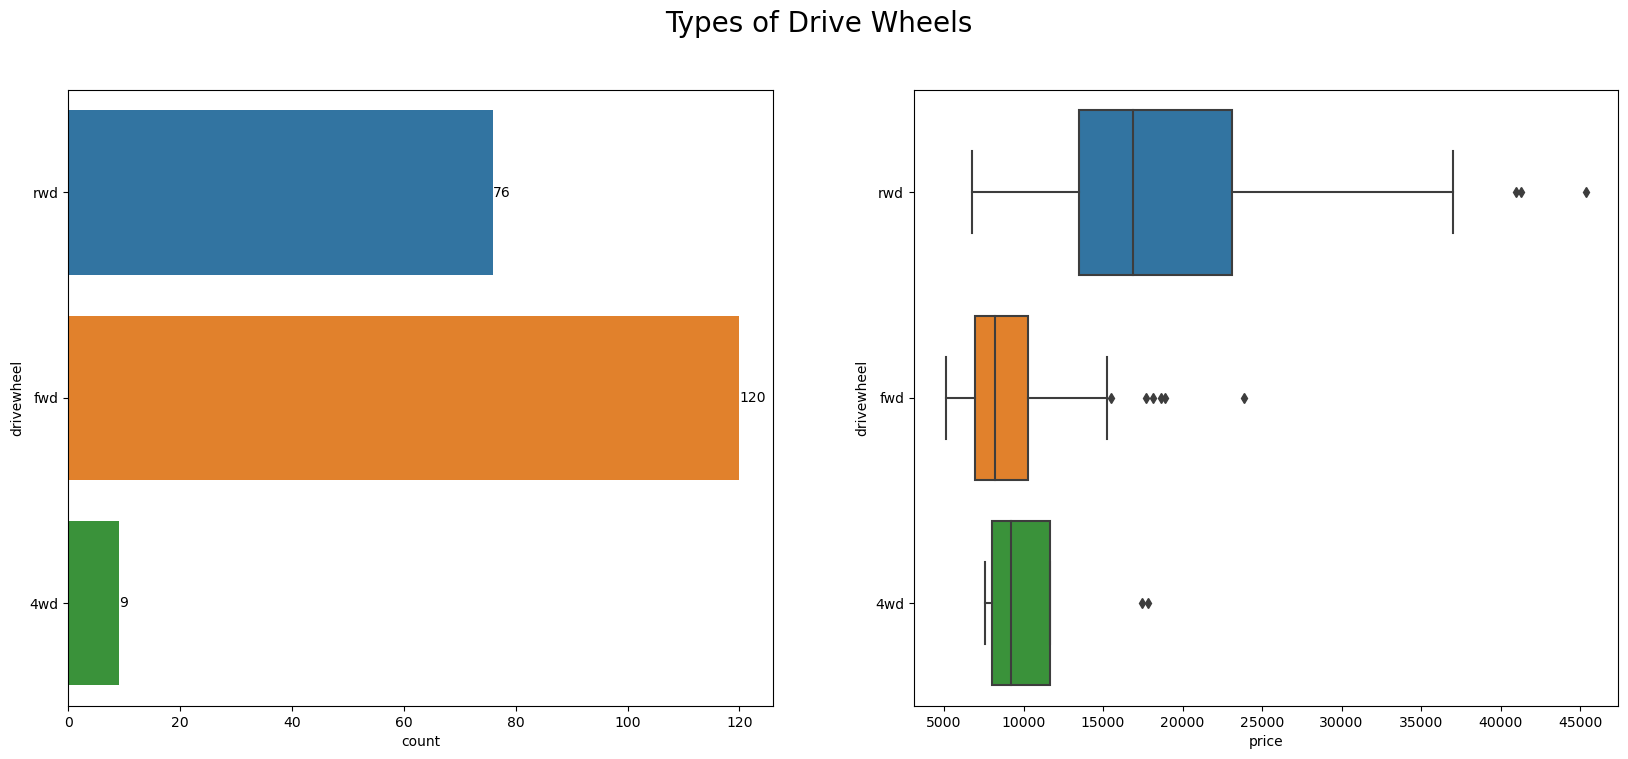

In [25]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["drivewheel"], ax=ax[0])
sns.boxplot(data=train, y="drivewheel",x="price", ax=ax[1])

plt.suptitle('Types of Drive Wheels', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

#### Observation:

- Given the fact that they are utilised in sports cars and trucks, rwd wheel systems automobiles are pricey.
- FWD cars are the most affordable all-wheel drive vehicles and are ideal for efficiency.
- Although less frequent, 4WD are often more expensive than FWD wheel systems.


### Fuel System

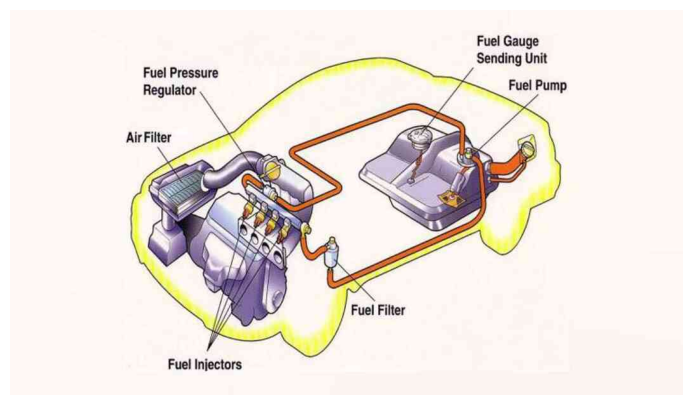

In [26]:
%matplotlib inline
img=mpimg.imread("Images/fuel-system-in-car-engine.jpg")
plt.figure(figsize=(15,5))
plt.axis('off')
plt.imshow(img)
plt.show()

#### The fuel supply system in a petrol engine comprises various components that work together to transfer a set amount of fuel from a car’s fuel tank to its engine for combustion. These components include a fuel tank, fuel pump, carburettor, fuel injectors, fuel filters and fuel lines.

#### The primary function of this system is to store and supply fuel for the engines. Petrol gets drawn from the tank through fuel lines to the injector by fuel pumps. The fuel injection system pumps the required fuel to a car’s engine for combustion.

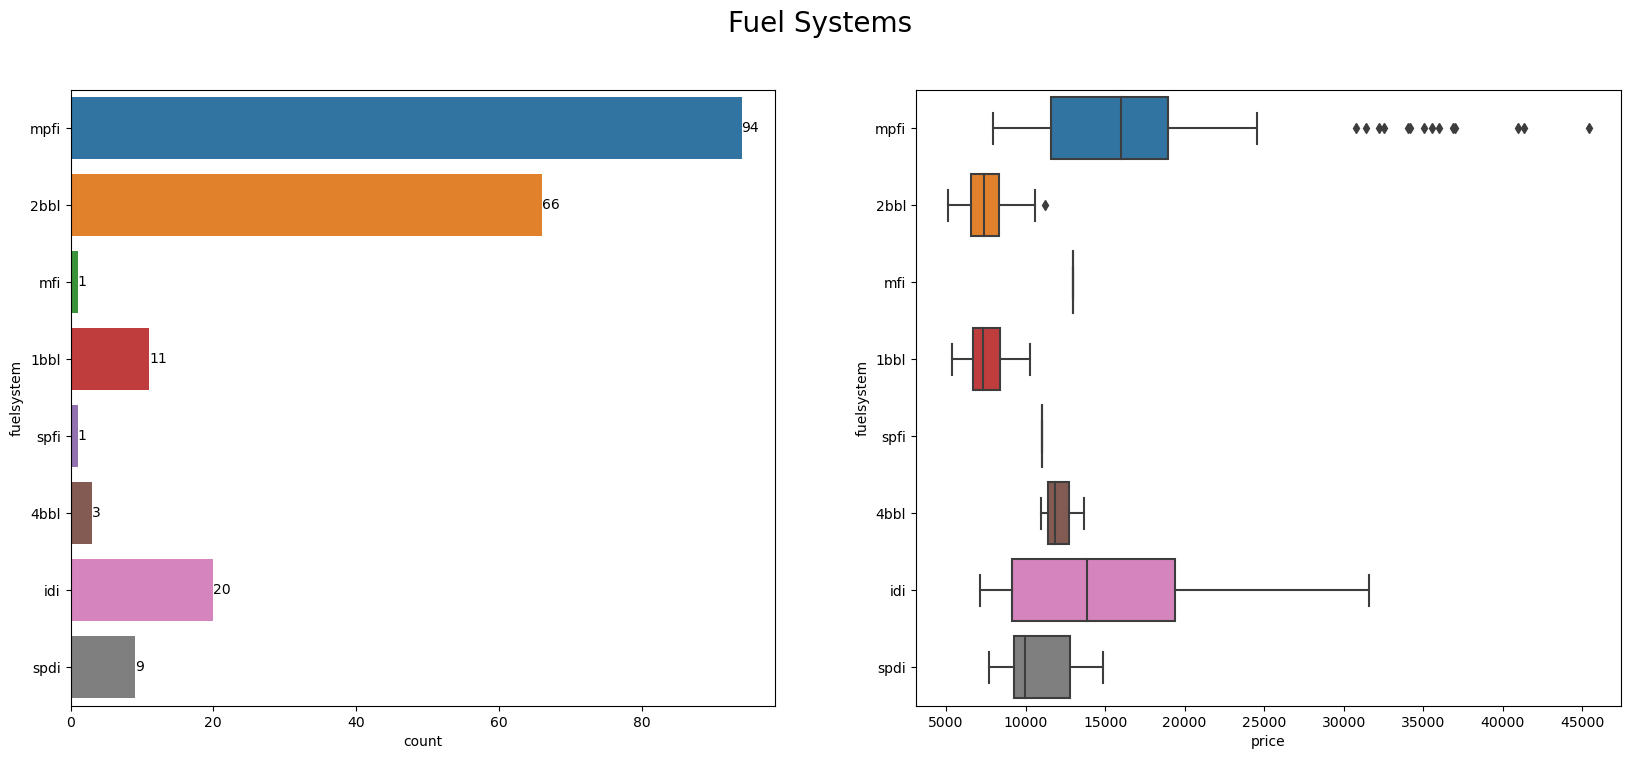

In [27]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["fuelsystem"], ax=ax[0])
sns.boxplot(data=train, y="fuelsystem",x="price", ax=ax[1])

plt.suptitle('Fuel Systems', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

#### Observation:

- The majority of cars have mpfi and 2bbl fuel systems.
- The most costly cars are those with an mpfi fuel system, followed by those with an idi fuel system.
- Surprisingly, although not being particularly expensive, 2bbl systems are the second most popular. While the other systems, with the exception of mpfi, present extremely few data points, they are nonetheless costly when compared to 2bbl.

### Engine Location

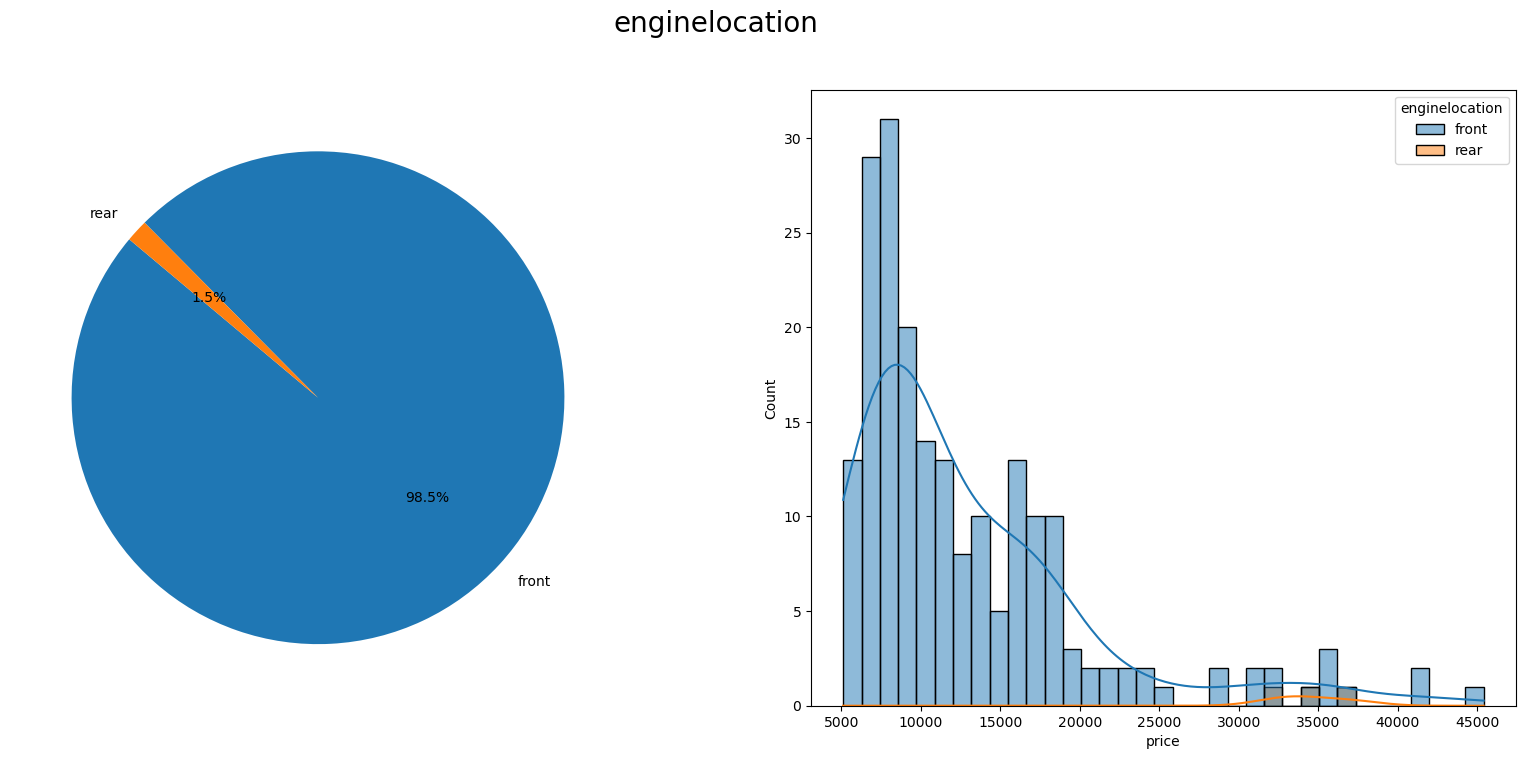

In [28]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

labels = train['enginelocation'].value_counts().index
sizes = train['enginelocation'].value_counts().values

ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
sns.histplot(data=train, x="price", hue="enginelocation", bins = 35, kde=True, ax=ax[1])

plt.suptitle('enginelocation', fontsize=20)

plt.show()

#### Observation:

- The most typical place for an engine is in the front. Nearly all of the passenger cars in, including hatchbacks and sedans, have a front-engine design and come in a variety of price ranges.
- Rear engine is the least prevalent configuration because they are used in sports cars and quite expensive.

### Engine Types

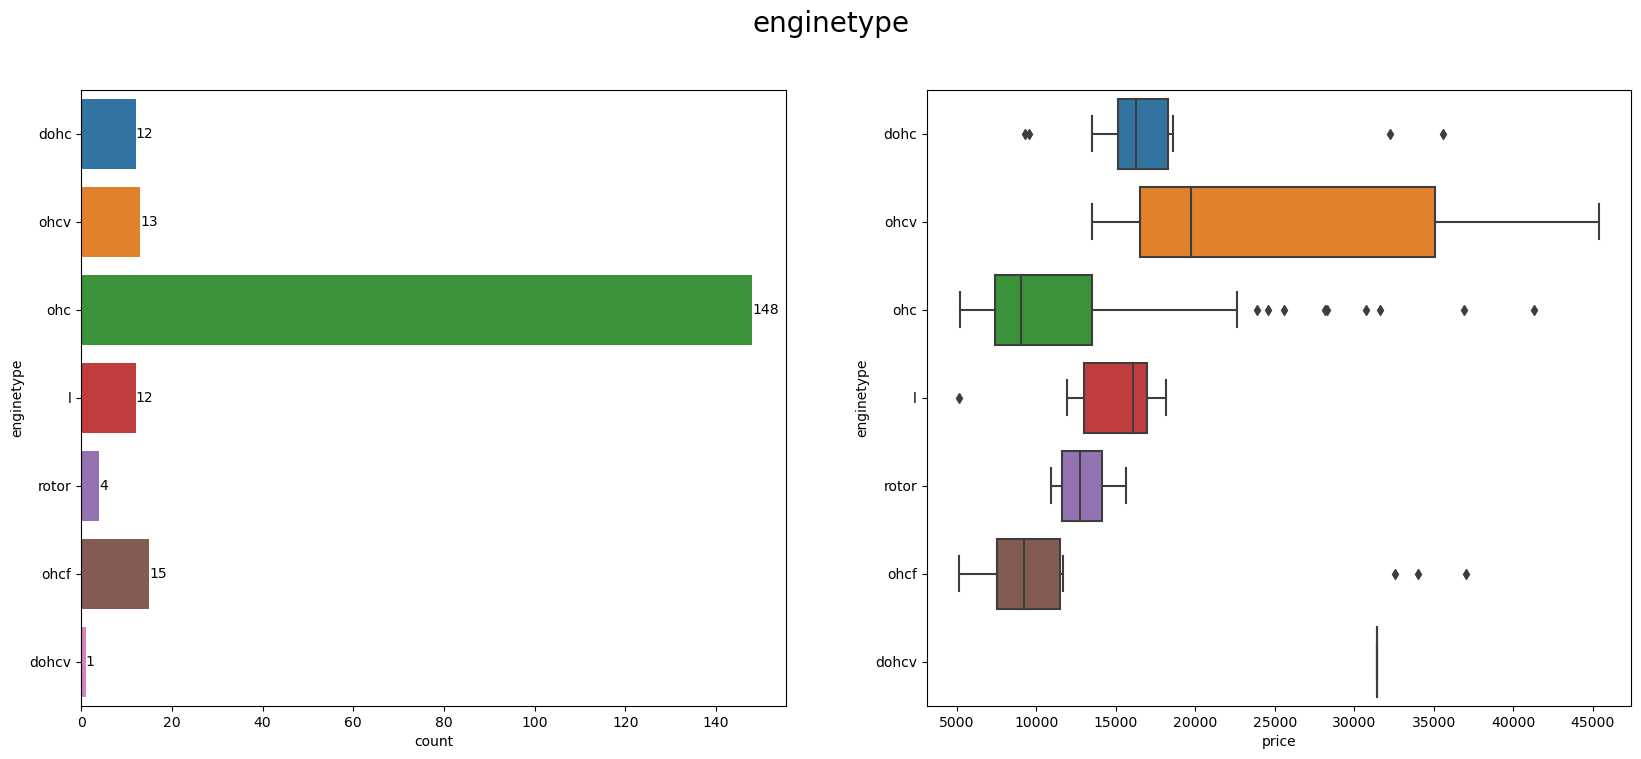

In [29]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["enginetype"], ax=ax[0])
sns.boxplot(data=train, y="enginetype",x="price", ax=ax[1])

plt.suptitle('enginetype', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

#### Observation:

- OHC engines are typically found in the least expensive cars, which are the majority of those sold.

- The remaining engine types have very few data points, making it challenging to draw conclusions.

### Number of Cylinders

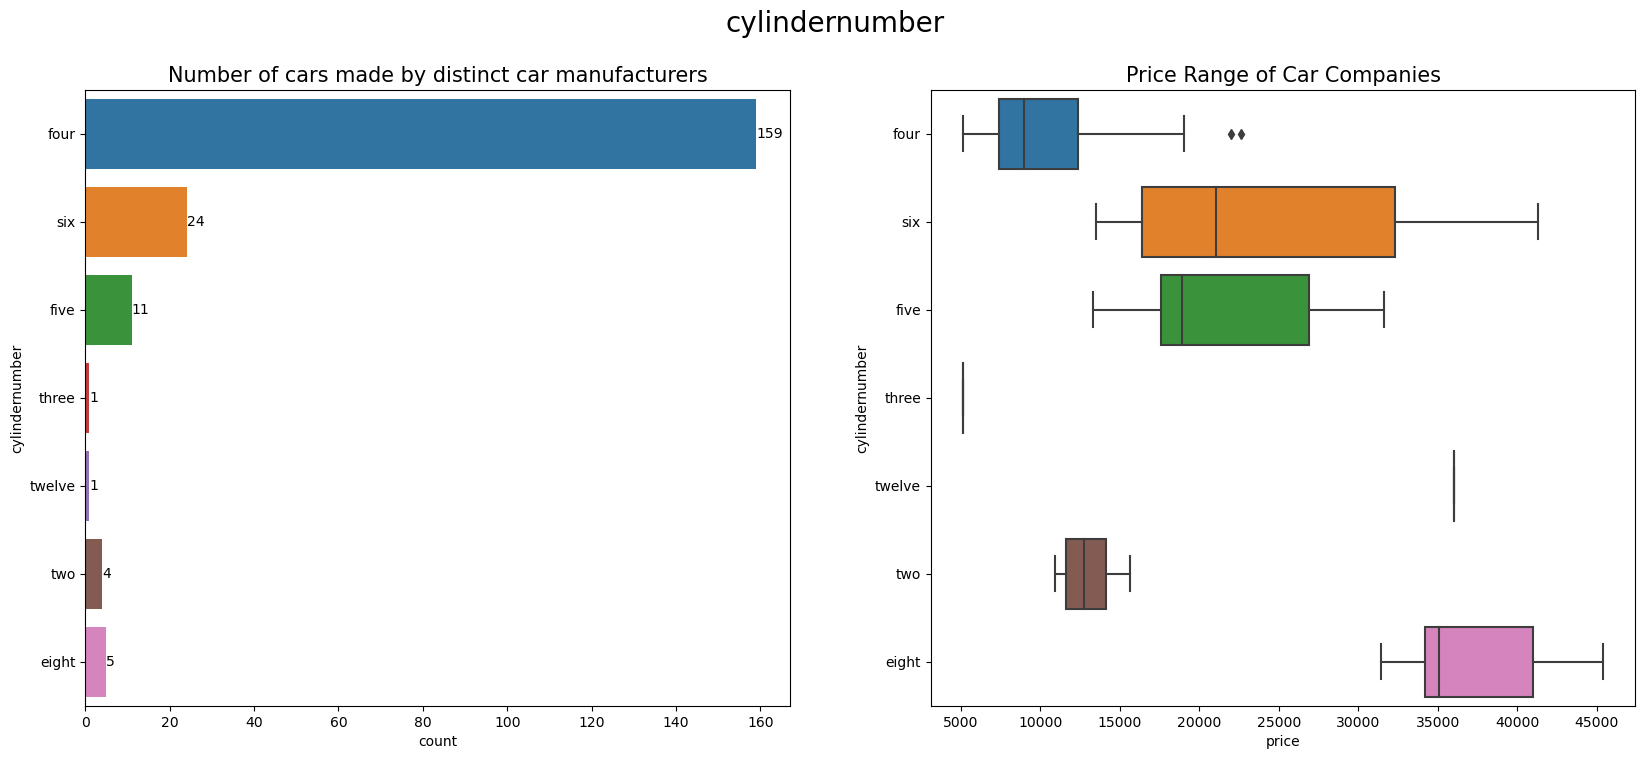

In [30]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["cylindernumber"], ax=ax[0]).set_title("Number of cars made by distinct car manufacturers", fontsize=15)
sns.boxplot(data=train, y="cylindernumber",x="price", ax=ax[1]).set_title("Price Range of Car Companies", fontsize=15)

plt.suptitle('cylindernumber', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

#### Observation:

- Four-cylinder engines are the most common and have the lowest average prices in autos.
- The most expensive cars are those with eight cylinder, followed by those with six.

### Insurance Risk rating

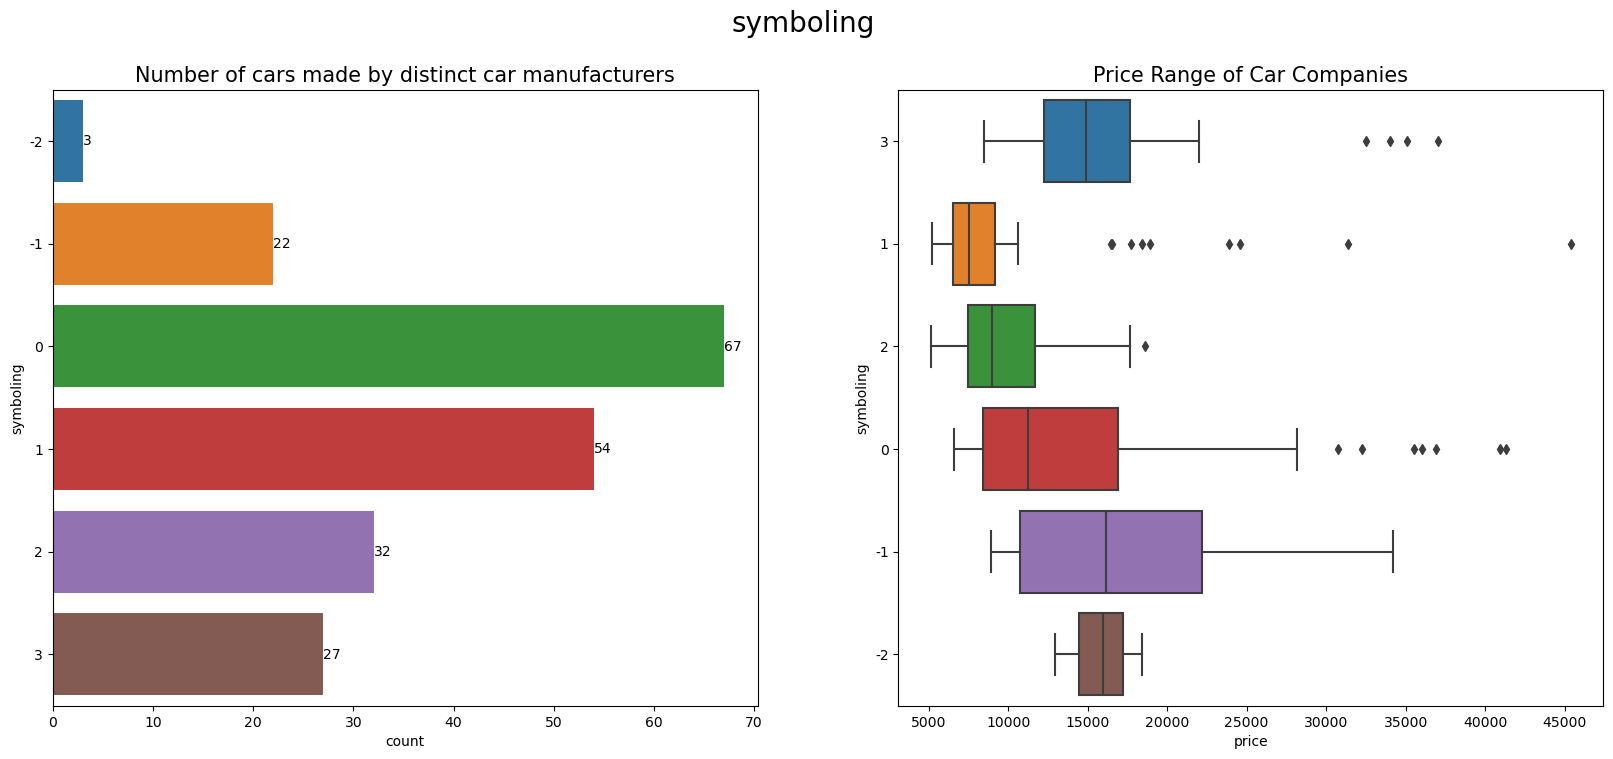

In [31]:
temp = train.copy()
temp['symboling'] = temp['symboling'].astype(str)

fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.countplot(y=train["symboling"], ax=ax[0]).set_title("Number of cars made by distinct car manufacturers", fontsize=15)
sns.boxplot(data=temp, y="symboling",x="price", ax=ax[1]).set_title("Price Range of Car Companies", fontsize=15)


plt.suptitle('symboling', fontsize=20)
for i in range(0,1):
    for container in ax[i].containers:
        ax[i].bar_label(container) 
plt.show()

#### Observation:

- Cars with the symbols 0 or 1 are clearly preferred more often than those with -2, which is the least popular.
- Additionally, we can see that symboling -1, 0, and 3 is expensive.


# Quantitative Features

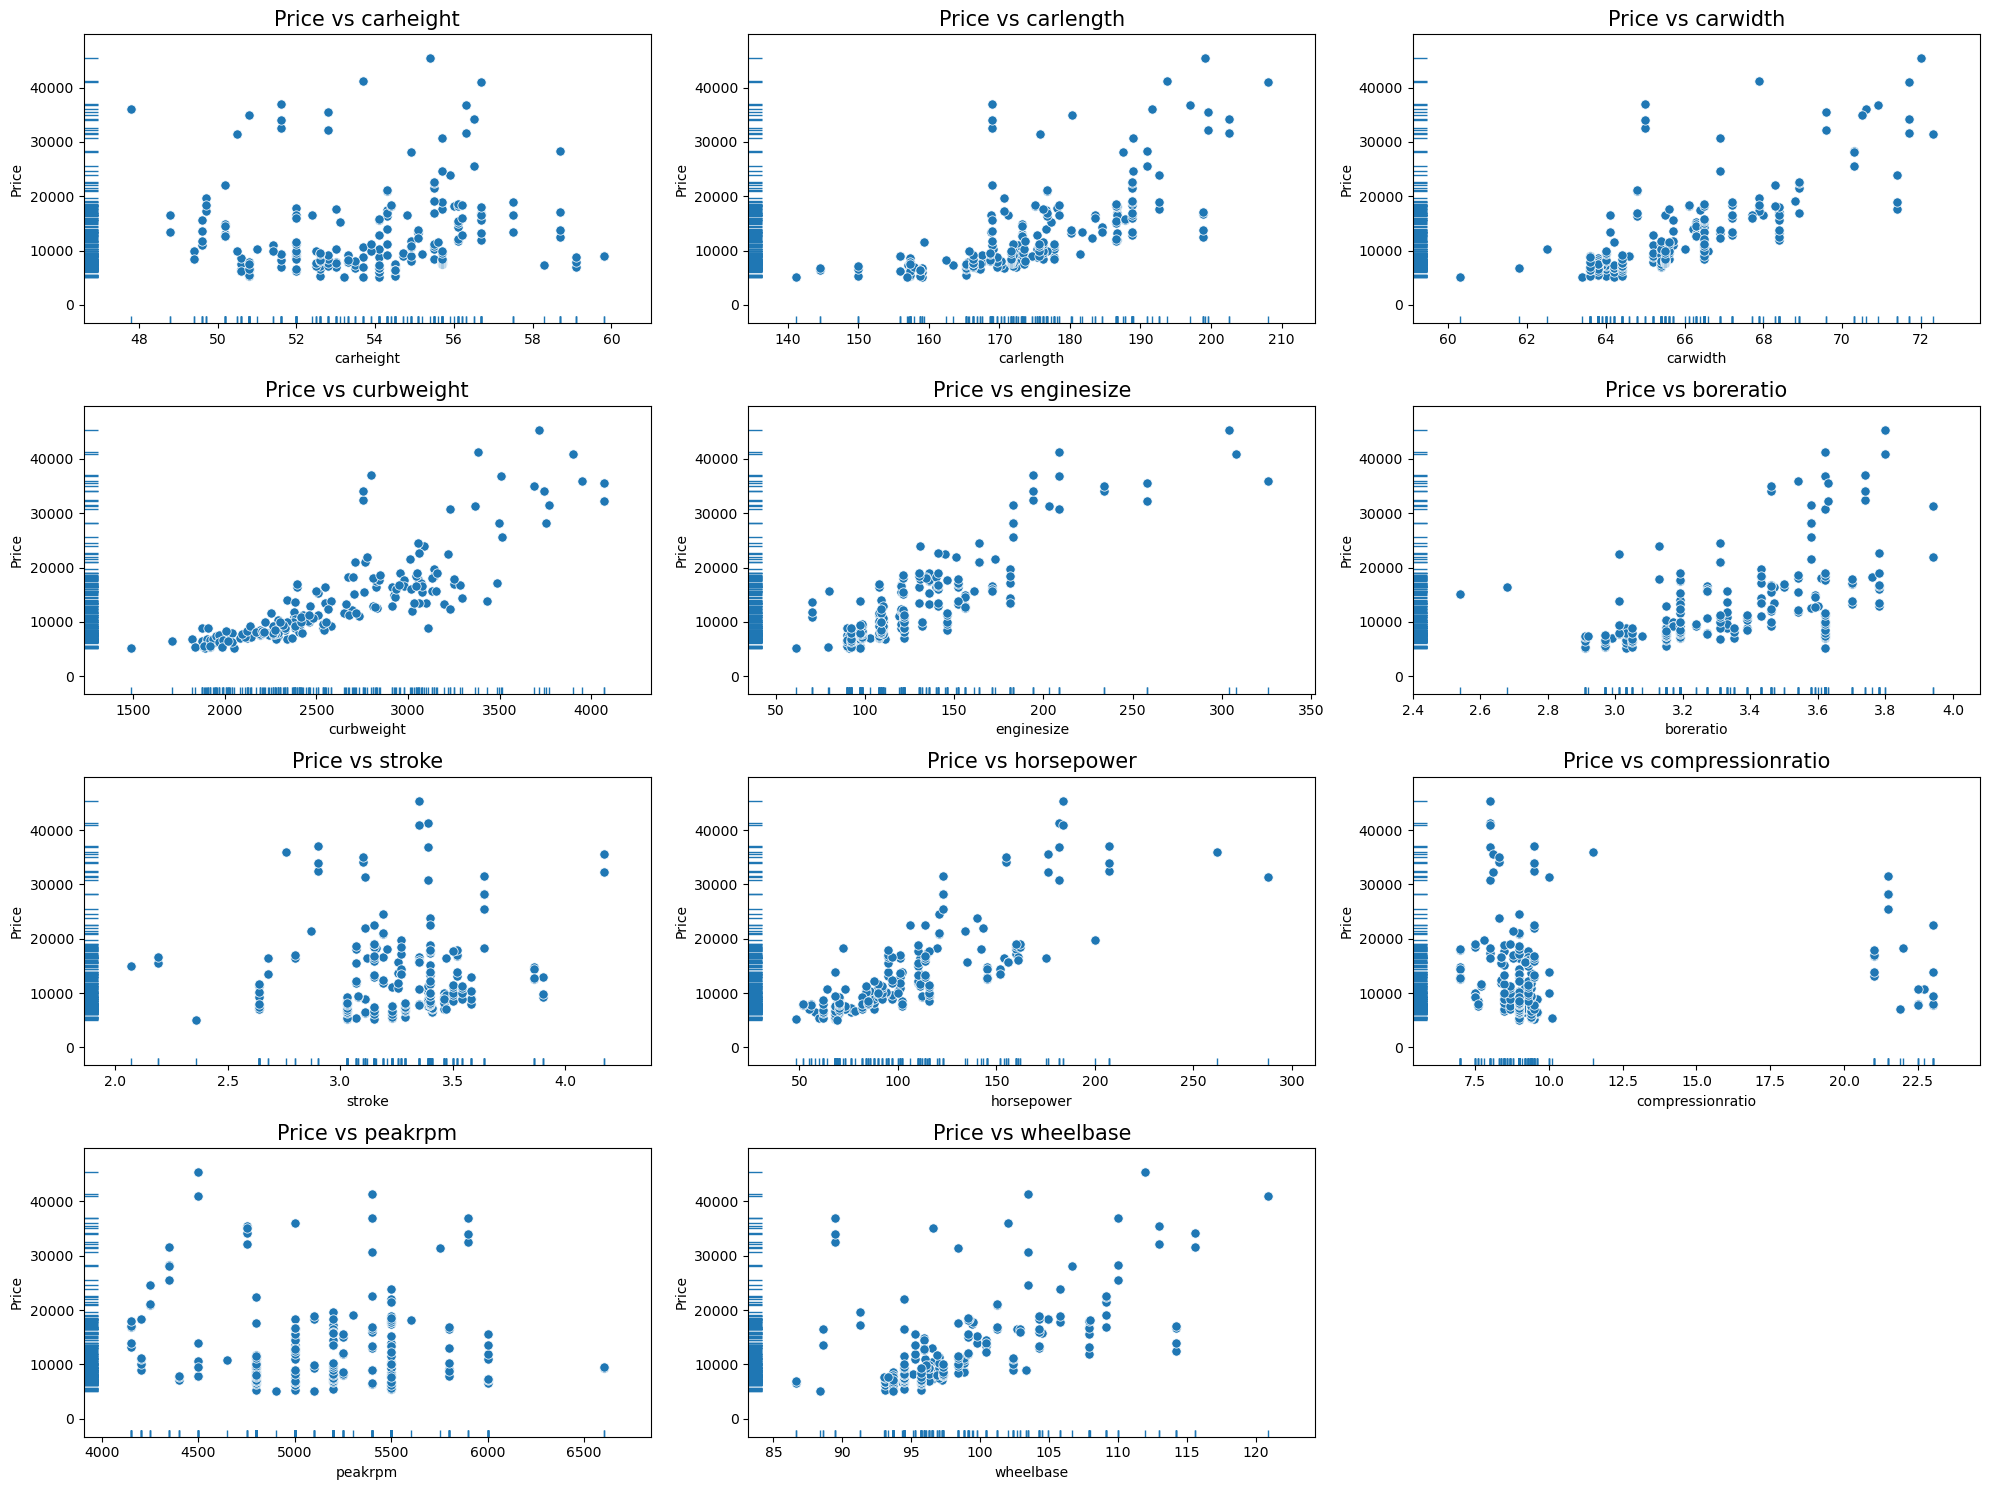

In [32]:

numericals = ['carheight', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
              'boreratio', 'stroke', 'horsepower', 'compressionratio', 
              'peakrpm','wheelbase']

plt.figure(figsize=(20, 15))
for i, xaxis in enumerate(numericals, start=1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=xaxis, y='price', data=train, s=45).set_title("Price vs "+xaxis, fontsize=15)
    sns.rugplot(data=train, x=xaxis, y="price")
    plt.xlabel(xaxis)
    plt.ylabel('Price')
    plt.tight_layout()

plt.show()


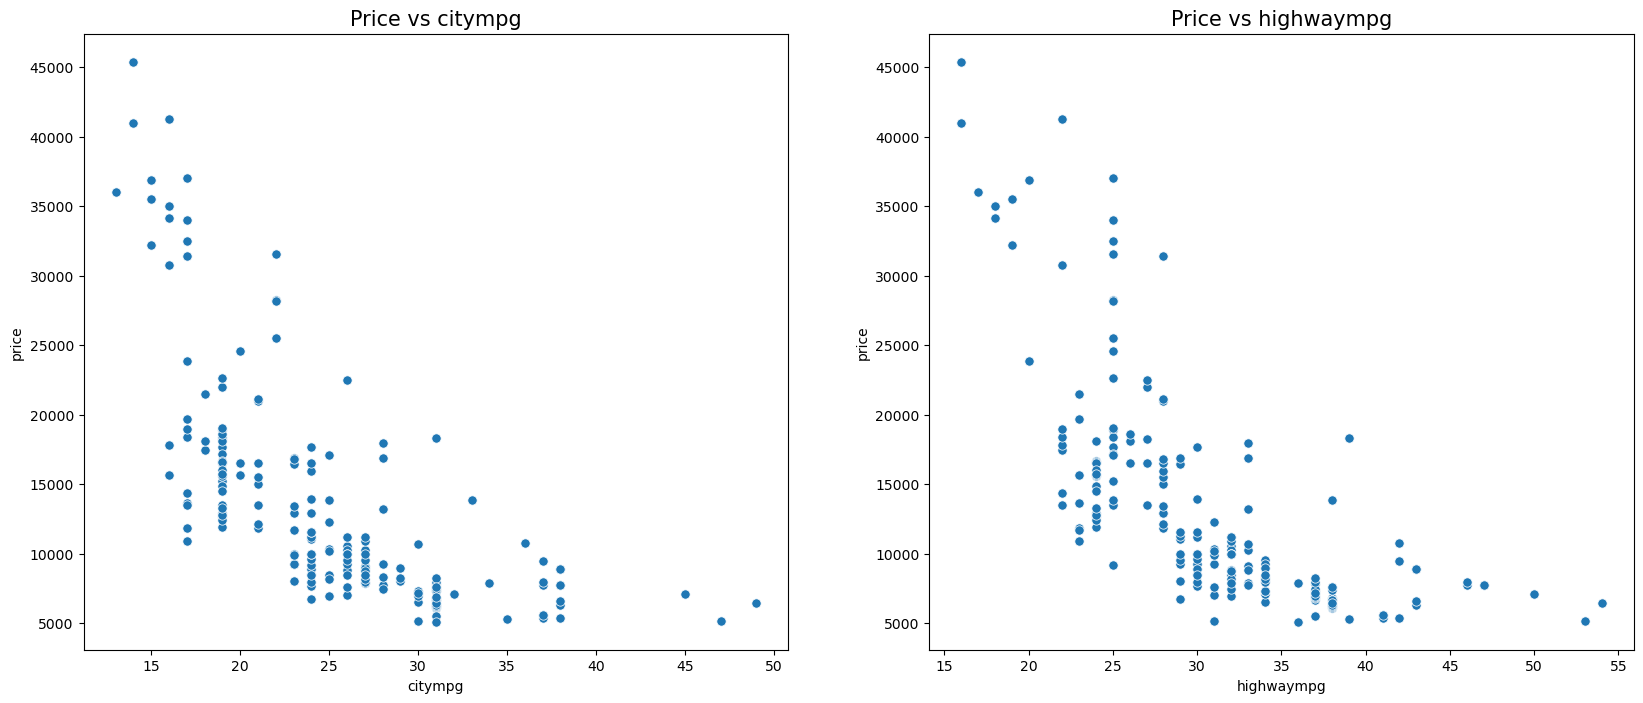

In [33]:
fig, ax = plt.subplots(1,2 ,figsize=(20,8))

sns.scatterplot(x='citympg', y='price', data=train, s=45,  ax=ax[0]).set_title("Price vs citympg", fontsize=15)
sns.scatterplot(x='highwaympg', y='price', data=train, s=45 , ax=ax[1]).set_title("Price vs highwaympg", fontsize=15)

plt.show()

In [34]:
train.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

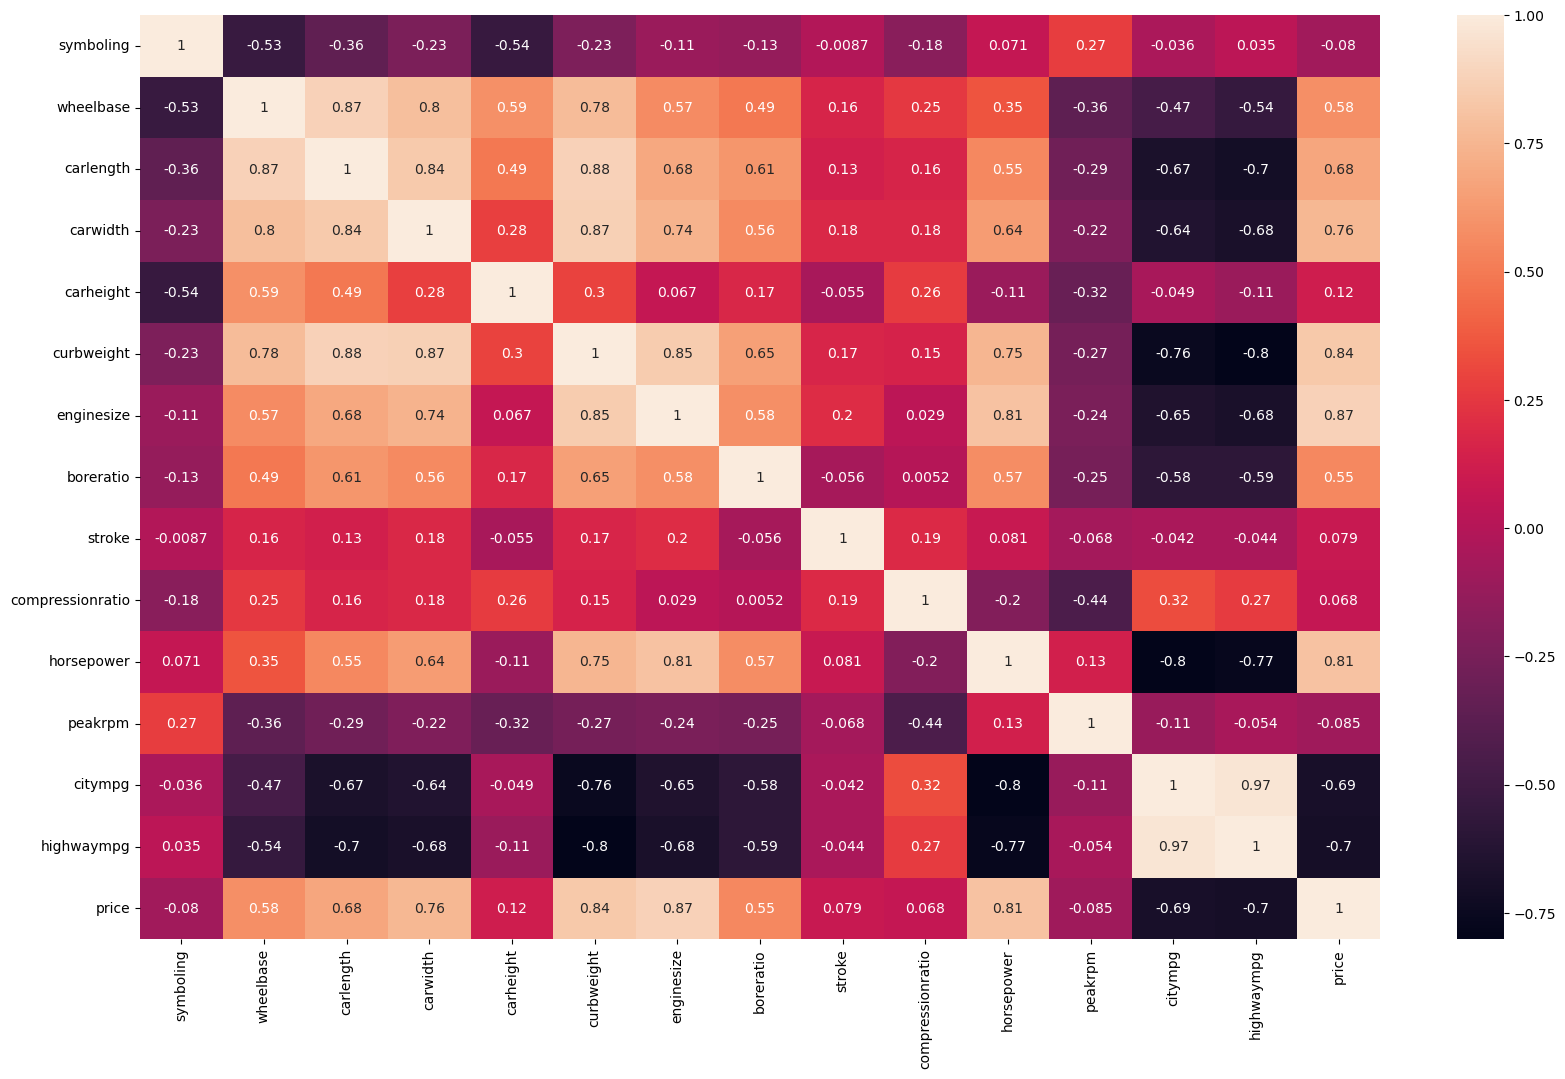

In [35]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Data Preparation

In [36]:
train.drop(['symboling','CarName','carheight','stroke','peakrpm'], axis=1, inplace=True)

In [37]:
train

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0        gas        std        two  convertible        rwd          front   
1        gas        std        two  convertible        rwd          front   
2        gas        std        two    hatchback        rwd          front   
3        gas        std       four        sedan        fwd          front   
4        gas        std       four        sedan        4wd          front   
..       ...        ...        ...          ...        ...            ...   
200      gas        std       four        sedan        rwd          front   
201      gas      turbo       four        sedan        rwd          front   
202      gas        std       four        sedan        rwd          front   
203   diesel      turbo       four        sedan        rwd          front   
204      gas      turbo       four        sedan        rwd          front   

     wheelbase  carlength  carwidth  curbweight enginetype cylindernumber  \
0         88.6      168.8      64.1        2548       dohc           four   
1         88.6      168.8      64.1        2548       dohc           four   
2         94.5      171.2      65.5        2823       ohcv            six   
3         99.8      176.6      66.2        2337        ohc           four   
4         99.4      176.6      66.4        2824        ohc           five   
..         ...        ...       ...         ...        ...            ...   
200      109.1      188.8      68.9        2952        ohc           four   
201      109.1      188.8      68.8        3049        ohc           four   
202      109.1      188.8      68.9        3012       ohcv            six   
203      109.1      188.8      68.9        3217        ohc            six   
204      109.1      188.8      68.9        3062        ohc           four   

     enginesize fuelsystem  boreratio  compressionratio  horsepower  citympg  \
0           130       mpfi       3.47               9.0         111       21   
1           130       mpfi       3.47               9.0         111       21   
2           152       mpfi       2.68               9.0         154       19   
3           109       mpfi       3.19              10.0         102       24   
4           136       mpfi       3.19               8.0         115       18   
..          ...        ...        ...               ...         ...      ...   
200         141       mpfi       3.78               9.5         114       23   
201         141       mpfi       3.78               8.7         160       19   
202         173       mpfi       3.58               8.8         134       18   
203         145        idi       3.01              23.0         106       26   
204         141       mpfi       3.78               9.5         114       19   

     highwaympg    price     Car_comp  
0            27  13495.0  alfa-romero  
1            27  16500.0  alfa-romero  
2            26  16500.0  alfa-romero  
3            30  13950.0         audi  
4            22  17450.0         audi  
..          ...      ...          ...  
200          28  16845.0        volvo  
201          25  19045.0        volvo  
202          23  21485.0        volvo  
203          27  22470.0        volvo  
204          25  22625.0        volvo  

[205 rows x 21 columns]

In [38]:
X = train.copy()

In [39]:
x = X.drop(columns=["price"])
y = X["price"]

In [40]:
x.shape

(205, 20)

## Standard Scaling Numerical Values


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

X[num_cols] = scaler.fit_transform(X[num_cols])

## One-hot Encoding

In [43]:
X = pd.get_dummies(columns=['fueltype','aspiration','doornumber','carbody','enginelocation','drivewheel','enginetype','cylindernumber','fuelsystem','Car_comp'],data=X)

In [44]:
X

wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0    -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
1    -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
2    -0.708596  -0.231513 -0.190566    0.514882    0.604046  -2.404880   
3     0.173698   0.207256  0.136542   -0.420797   -0.431076  -0.517266   
4     0.107110   0.207256  0.230001    0.516807    0.218885  -0.517266   
..         ...        ...       ...         ...         ...        ...   
200   1.721873   1.198549  1.398245    0.763241    0.339248   1.666445   
201   1.721873   1.198549  1.351515    0.949992    0.339248   1.666445   
202   1.721873   1.198549  1.398245    0.878757    1.109571   0.926204   
203   1.721873   1.198549  1.398245    1.273437    0.435538  -1.183483   
204   1.721873   1.198549  1.398245    0.975021    0.339248   1.666445   

     compressionratio  horsepower   citympg  highwaympg    price  \
0                 9.0    0.174483 -0.646553   -0.546059  13495.0   
1                 9.0    0.174483 -0.646553   -0.546059  16500.0   
2                 9.0    1.264536 -0.953012   -0.691627  16500.0   
3                10.0   -0.053668 -0.186865   -0.109354  13950.0   
4                 8.0    0.275883 -1.106241   -1.273900  17450.0   
..                ...         ...       ...         ...      ...   
200               9.5    0.250533 -0.340094   -0.400490  16845.0   
201               8.7    1.416637 -0.953012   -0.837195  19045.0   
202               8.8    0.757535 -1.106241   -1.128332  21485.0   
203              23.0    0.047732  0.119594   -0.546059  22470.0   
204               9.5    0.250533 -0.953012   -0.837195  22625.0   

     fueltype_diesel  fueltype_gas  aspiration_std  aspiration_turbo  ...  \
0                  0             1               1                 0  ...   
1                  0             1               1                 0  ...   
2                  0             1               1                 0  ...   
3                  0             1               1                 0  ...   
4                  0             1               1                 0  ...   
..               ...           ...             ...               ...  ...   
200                0             1               1                 0  ...   
201                0             1               0                 1  ...   
202                0             1               1                 0  ...   
203                1             0               0                 1  ...   
204                0             1               0                 1  ...   

     Car_comp_isuzu  Car_comp_jaguar  Car_comp_mazda  Car_comp_mercury  \
0                 0                0               0                 0   
1                 0                0               0                 0   
2                 0                0               0                 0   
3                 0                0               0                 0   
4                 0                0               0                 0   
..              ...              ...             ...               ...   
200               0                0               0                 0   
201               0                0               0                 0   
202               0                0               0                 0   
203               0                0               0                 0   
204               0                0               0                 0   

     Car_comp_mitsubishi  Car_comp_nissan  Car_comp_peugeot  \
0                      0                0                 0   
1                      0                0                 0   
2                      0                0                 0   
3                      0                0                 0   
4                      0                0                 0   
..                   ...              ...               ...   
200                    0                0   

# Model Building

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 71)
X Test  :  (62, 71)
Y Train :  (143,)
Y Test  :  (62,)


In [47]:
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree Regressor': DecisionTreeRegressor(),
        'Random Forest Regressor': RandomForestRegressor(),
        'KNeighbors Regressor': KNeighborsRegressor()
    }
    
    results = {}
    training_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Training Scores
        y_pred_train = model.predict(X_train)
        r2_train = r2_score(y_train, y_pred_train) * 100
        training_scores[name] = r2_train
        
        #Test Scores
        r2_test = r2_score(y_test, y_pred) * 100
        results[name] = r2_test

        
    # Create DataFrame for scores
    scores = pd.DataFrame(training_scores.items(), columns=['Model', 'Training Score'])
    scores['Test Score'] = results.values()
    
    return scores


In [48]:
scores_df = evaluate_models(X_train, y_train, X_test, y_test)
print(scores_df)

                     Model  Training Score  Test Score
0        Linear Regression      100.000000  100.000000
1  Decision Tree Regressor      100.000000   98.805989
2  Random Forest Regressor       99.910723   98.807515
3     KNeighbors Regressor       99.733495   98.331308


# Results

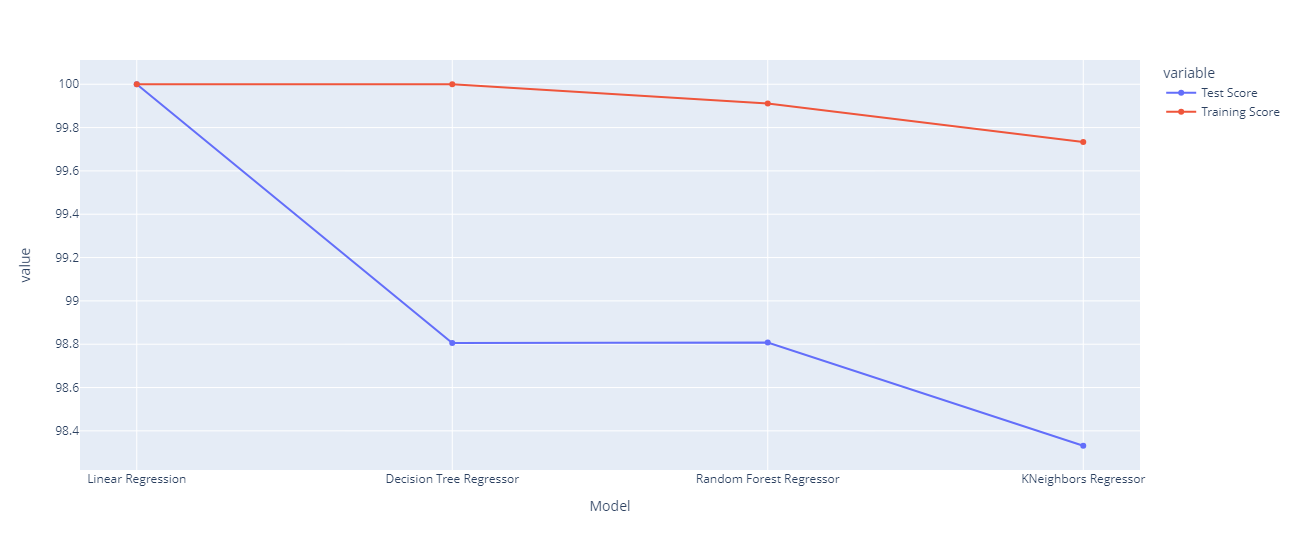

In [49]:
fig = px.line(scores_df, x="Model",  y=["Test Score", "Training Score"],markers=True)
fig.update_layout(height=550)
fig.show()

### Model Results:

#### Linear Regression = 100
#### Random Forest Regressor = 98.807515
#### Decision Tree Regressor = 98.805989
#### KNeighbors Regressor = 98.331308
